## Zadanie 2 - słownik ##
- Zaimplementuj metodę generującą drzewo przeszukiwania binarnego na podstawie struktury robotówz wcześniejszych list.Kluczowy parametr struktury (parametr robota, względem którego tworzone jest drzewo) zadaje użytkownik. Zaimplementuj efektywne algorytmy:
    - przechodzenia drzewa metodami inorder, preorder i postorder,
    - wyszukiwania elementu (i ścieżki prowadzącej do tego elementu, zaczynając od korzenia),
    - wyszukiwania minimum i maksimum,
    -  wyszukiwania następnika i poprzednika zadanego węzła,
    - wstawiania i usuwania węzła.

In [1]:
import networkx as nx
from L6_0_data_structure import create_m_bots
import matplotlib.pyplot as plt
from hierarchy_layout import hierarchy_pos
from temp import create_robots

In [2]:
class Node:
    def __init__(self, value, params, left=None, right=None):
        self.value = value
        self.params = params
        self.left = left
        self.right = right

    def add_left(self, value):
        self.left = Node(value)

    def add_left(self, value):
        self.right = Node(value)

    def print_graph(self):
        if self.left:
            self.left.print_graph()
        print(self.value),
        if self.right:
            self.right.print_graph()
        
    def inorder_traversal(self, root):
        res = []

        if root:
            res = self.inorder_traversal(root.left)
            res.append(root.value)
            res += res + self.inorder_traversal(root.right)
        return res

In [3]:
def array_to_tree(arr, f):
    """
    Funkcja tworząca zrównowarzone drzewo binarne z posortowanej listy wierzchołków
    :param list arr: posortowana lista wierzchołków
    :param f: główna cecha która świadczy o wartości węzła
    :return object root: objekt klasy Node - korzeń grafu
    """
    if not arr:
        return None
 
    mid = (len(arr)) // 2

    
    # przypisanie środkowego elementu jako węzła drzewa 
    root = Node(arr[mid][f], arr[mid])

    # podział listy na pół
    root.left = array_to_tree(arr[:mid], f)
    root.right = array_to_tree(arr[mid+1:], f)

    return root

In [4]:
def get_edges(root):
    """"
    Funkcja zwraca krawędzie grafu - połaczenia w drzewie
    :param root: korzeń drzewa
    :return list edges: lista krawędzi
    """
    edges = []
    if root.left:
        edges += get_edges(root.left)
        edges.append((root.value, root.left.value))
        
    if root.right:
        edges += get_edges(root.right)
        edges.append((root.value, root.right.value))

    return edges
        

def visualiz_graph(root):
    """
    Funkcja tworząca wykres drzewa
    :param root: korzeń - węzeł od którego zaczynamy tworzyć drzewo
    """
    nodes = []
    edges = get_edges(root)

    for item in edges:
        if item[0] not in nodes:
            nodes.append(item[0])
        if item[1] not in nodes:
            nodes.append(item[1])

    g = nx.Graph()
    colors = ['red' if n == root.value else 'orange' for n in nodes]

    g.add_nodes_from(nodes)
    g.add_edges_from(edges)
    #pos = nx.spectral_layout(g)
    pos = hierarchy_pos(g, root.value)
    nx.draw(g, pos, node_color=colors)
    nx.draw_networkx_labels(g, pos=pos)
    plt.show()

In [5]:
# generownie wektora robotów
# możemy wylosować dowolną ilość robotów
bots = create_m_bots(19)
bots = [b.save_robot() for b in bots]
bots


[{'id': '10100010', 'typ': 'CWA', 'masa': 209, 'roz': 44},
 {'id': '00001110', 'typ': 'WUG', 'masa': 648, 'roz': 215},
 {'id': '00110111', 'typ': 'VVU', 'masa': 443, 'roz': 148},
 {'id': '01110000', 'typ': 'CGN', 'masa': 240, 'roz': 265},
 {'id': '01110001', 'typ': 'CGC', 'masa': 562, 'roz': 20},
 {'id': '00000100', 'typ': 'GAA', 'masa': 1993, 'roz': 43},
 {'id': '01011110', 'typ': 'CNW', 'masa': 1323, 'roz': 93},
 {'id': '01101100', 'typ': 'AGA', 'masa': 315, 'roz': 34},
 {'id': '11111100', 'typ': 'GGN', 'masa': 51, 'roz': 33},
 {'id': '11100000', 'typ': 'GVG', 'masa': 1870, 'roz': 258},
 {'id': '00101111', 'typ': 'CWN', 'masa': 1340, 'roz': 295},
 {'id': '10001100', 'typ': 'CWW', 'masa': 1840, 'roz': 168},
 {'id': '11001000', 'typ': 'VVU', 'masa': 463, 'roz': 160},
 {'id': '11011101', 'typ': 'ANW', 'masa': 331, 'roz': 185},
 {'id': '10111100', 'typ': 'NAN', 'masa': 412, 'roz': 219},
 {'id': '11111110', 'typ': 'WVV', 'masa': 1548, 'roz': 60},
 {'id': '01100110', 'typ': 'NNA', 'masa': 

In [17]:
# wybranie cechy przez użytkownika
#feat = input('Podaj cechę: ')
feat = 'masa'
bots = sorted(bots, key=lambda x: x[feat])
ROOT = array_to_tree(bots, feat)
ROOT

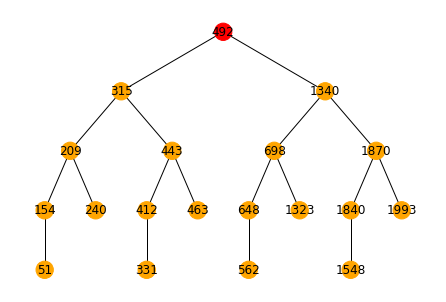

In [18]:
visualiz_graph(ROOT)

## Przechodznie metodą in-order ##
lewy - korzeń - prawy

In [19]:
def inorder_traversal(root):
    # left - root - right 
    path = []

    if root:

        path += inorder_traversal(root.left)
        path.append(root.value)

        path += inorder_traversal(root.right)

    return path

print(inorder_traversal(ROOT))

[51, 154, 209, 240, 315, 331, 412, 443, 463, 492, 562, 648, 698, 1323, 1340, 1548, 1840, 1870, 1993]


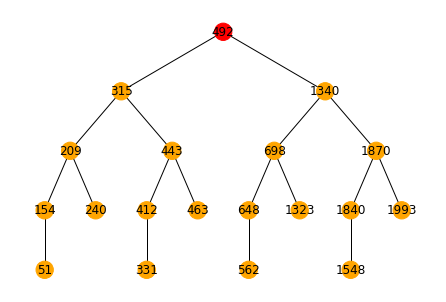

In [20]:
visualiz_graph(ROOT)

## Przechodzenie drzewa metodą preorder ##
korzeń - lewy - prawy

[492, 315, 209, 154, 51, 240, 443, 412, 331, 463, 1340, 698, 648, 562, 1323, 1870, 1840, 1548, 1993]


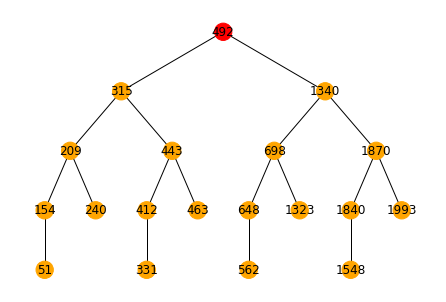

In [21]:
def preorder(root):
    path = []

    if root:
        path.append(root.value)
        path += preorder(root.left)
        path += preorder(root.right)
    
    return path

print(preorder(ROOT))
visualiz_graph(ROOT)

## Przechodznie drzewa metodą postorder ##
lewy - prawy - korzeń

In [22]:
def post_order(root):
    path = []

    if root:
        path += post_order(root.left)
        path += post_order(root.right)
        path.append(root.value)
    
    return path


print(post_order(ROOT))

[51, 154, 240, 209, 331, 412, 463, 443, 315, 562, 648, 1323, 698, 1548, 1840, 1993, 1870, 1340, 492]


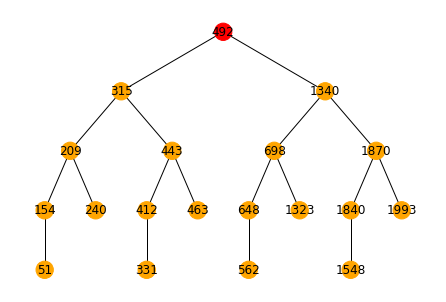

In [23]:
visualiz_graph(ROOT)

## Wyszukiwanie elementu ##

In [25]:
def find_node(root, value):
    if not root:
        return None
    if value == root.value:
        return root

    if value < root.value:
        return find_node(root.left, value)
    
    if value > root.value:
        return find_node(root.right, value)


node = find_node(ROOT, 1323)
print(node.params)

{'id': '01011110', 'typ': 'CNW', 'masa': 1323, 'roz': 93}


## Wyszukiwanie minimum i maksimum ##

In [26]:
def find_max(root):
    if root.right:
        return find_max(root.right)
    elif root.left:
        return root.left
    else:
        return root

def find_min(root):
    if root.left:
        return find_min(root.left)
    elif root.right:
        return root.right
    else:
        return root

print('MIN', find_min(ROOT).params)
print('MAX', find_max(ROOT).params)

MIN {'id': '11111100', 'typ': 'GGN', 'masa': 51, 'roz': 33}
MAX {'id': '00000100', 'typ': 'GAA', 'masa': 1993, 'roz': 43}


## Wyszukiwania następnika i poprzednika zadanego węzła ##
Następnik danego węzła jest węzłem, który jest odwiedzany jako następny w przypadku przechodzenia drzewa metodą in-order.

In [28]:
def find_succesor(root, node):
    # Step 1 of the above algorithm
    if node.right is not None:
        return find_min(node.right)
 
    # Step 2 of the above algorithm
    succ=Node(None)
     
     
    while(root):
        if(root.data < node.data):
            root=root.right
        elif(root.data > node.data):
            succ=root
            root=root.left
        else:
            break
    return succ


def find_predcessor(root, value, prec=None):
 
    # przypadek podstawowy
    if root is None:
        return prec
 
    if root.value == value:
        if root.left:
            return find_max(root.left)
 
    elif value < root.value:
        return find_predcessor(root.left, value, prec)
 
    else:
        prec = root
        return find_predcessor(root.right, value, prec)
 
    return prec


n = find_node(ROOT, 443)
print(n.params)
print(find_succesor(ROOT, n).params)
print(find_predcessor(ROOT, 443, None).params)

{'id': '00110111', 'typ': 'VVU', 'masa': 443, 'roz': 148}
{'id': '11001000', 'typ': 'VVU', 'masa': 463, 'roz': 160}
{'id': '11011101', 'typ': 'ANW', 'masa': 331, 'roz': 185}


## Wstawiania i usuwania węzła ##

In [29]:
def insert_node(root, value, params):
    # sprawdznie czy drzewo nie jest puste
    if root == None:
        return Node(value, params)
    else:
        if value <= root.value:
            # idzemy na lewo
            temp = insert_node(root.left, value, params)
            root.left = temp

        else:
            # idziemy na prowo
            temp = insert_node(root.right, value, params)
            root.right = temp

    return root

v = 1000
insert_node(ROOT, v, {'id': '1110', 'typ': 'VVW', 'masa': v, 'roz': 20})

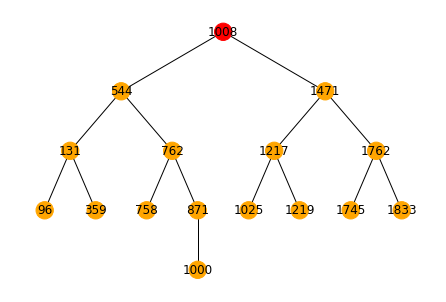

In [50]:
visualiz_graph(ROOT)

In [51]:
def delete_node(root, value):
   # przypadek bazowy
    if root is None:
        return root
 
    # wybieramy w którą stronę drzewa iść
    # idziemy w lewo
    if value < root.value:
        root.left = delete_node(root.left, value)
 
    # idziemy w prawo
    elif(value > root.value):
        root.right = delete_node(root.right, value)
 
    # jesteśmy w wężle do usunięcia
    else:
 
        # jeden syn lub brak synów
        if root.left is None:
            temp = root.right
            root = None
            return temp
 
        elif root.right is None:
            temp = root.left
            root = None
            return temp
 
        # węzeł z 2 synami:
        # szukamy najmniejszej wartości w prawym poddrzewie
        temp = find_min(root.right)
 
        root.value = temp.value
 
        # usuwamy natępny węzeł
        root.right = delete_node(root.right, temp.value)
 
    return root

delete_node(ROOT, 209)


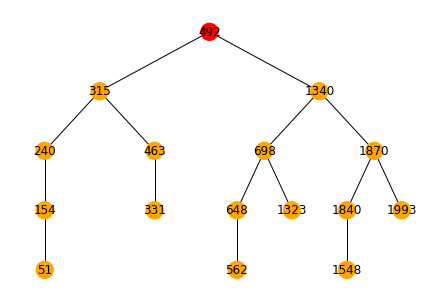

In [50]:
visualiz_graph(ROOT)

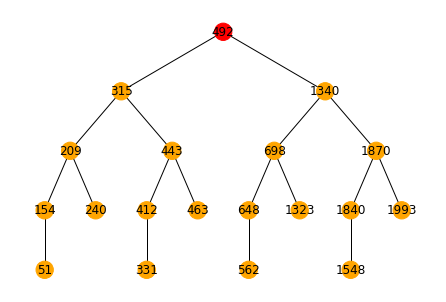

In [44]:
# Komórka do resetowania drzewa
ROOT = array_to_tree(bots, feat)
visualiz_graph(ROOT)